# Tutorial of [Cartopy](https://scitools.org.uk/cartopy/docs/latest/)

#### Created by Josué Martinez Moreno!

### Goals:

- Create your first map with cartopy.
- Explore different projections and their attributes. 
- Experiment creating a new map.
- Create your first scientific map.
- Understand the basics of cartopy.
- Create your own projection.

In this tutorial, you can just follow along and evaluate cells to see how to make nice, pretty plots! :)

### Let's create our first map!

In [1]:
# Import libraries:
# Import coordinate reference system
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

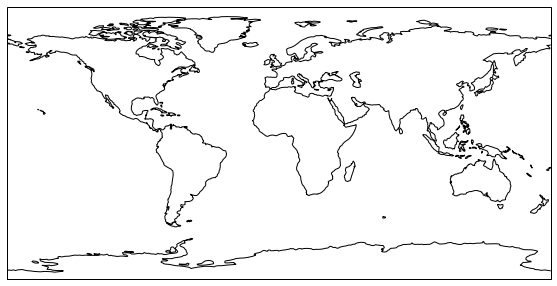

In [2]:
# Creating a map can be as simple as:
fig = plt.figure(figsize=(10, 5))
# Create axis with a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
# Draw coastlines
ax.coastlines()


#### This map is a bit boring, so let's add some colors:

In [ ]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Default topography image
ax.stock_img()
# Draw coastlines
ax.coastlines()

### Cartopy has multiple [projections](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html):
The following examples will include:
- PlateCarree
- Robinson
- Orthographic
- Sinusoidal

### Let's start with a Robinson projection:

In [ ]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
# Default topography image
ax.stock_img()
# Draw coastlines
ax.coastlines()

### Time to play arround with other projections!

Clue: Replace the argument projection with any of the projections availabe at:

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

In [ ]:
# Experiment 1


In [ ]:
# Experiment 2


## Now we are ready to plot some data on top of the maps:

In [15]:
#Import library to read netCDFs
import xarray as xr

#### Load mean SST data from NOAA

This dataset is stored in the /shared folder on the JupyterHub.

In [16]:
# Lazy opening of dataset.
# Lazy means means that only the metadata of the netcdf is read. 
monthly_mean_sst = xr.open_dataset('../shared/sst.mnmean.nc')

In [6]:
# Compute mean over record.
mean_sst = monthly_mean_sst.mean('time').sst

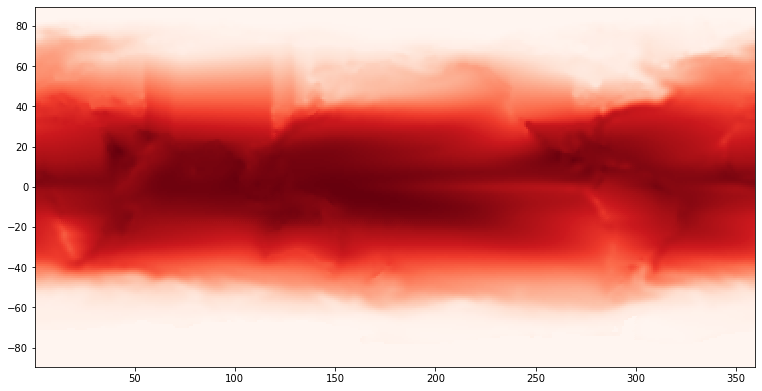

In [7]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add figure axes
ax = fig.add_axes([0,0,1,1])
# Plot data
plt.pcolormesh(mean_sst.lon,mean_sst.lat,mean_sst,cmap='Reds')

#### This is horrible, let's use cartopy!

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add figure axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Robinson())
# Plot data
p = plt.pcolormesh(mean_sst.lon,mean_sst.lat,mean_sst,transform=ccrs.PlateCarree(),cmap='Reds')
# Draw coastlines
ax.coastlines()

#### We don't expect to have Sea surface temperature over the continents, so let's mask the land.

In [8]:
# Import map features such as land, continents, contry boundaries and other.
import cartopy.feature as cfeature

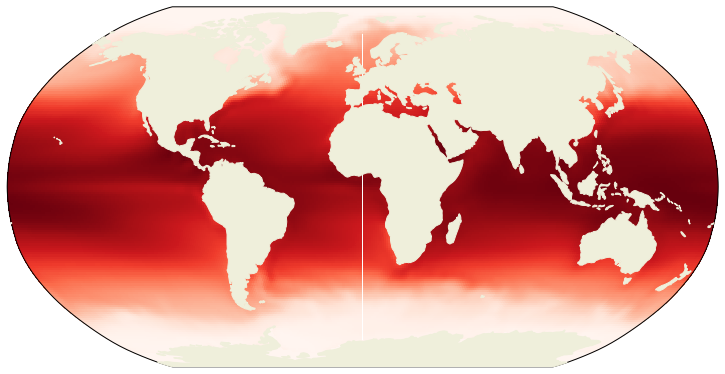

In [9]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add figure axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Robinson())
# Plot data
p = plt.pcolormesh(mean_sst.lon,mean_sst.lat,mean_sst,transform=ccrs.PlateCarree(),cmap='Reds')
# Draw continents
ax.add_feature(cfeature.LAND,zorder=10)

#### With that continental feature, we cant differentiate between low temperatures and the continentes, so let's customize a bit more our map.

First, we will create some custom features:

In [11]:
# Create country boundaries using Natural Earth Features: https://www.naturalearthdata.com
countries = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', 
                                        scale='110m',
                                        edgecolor='black',
                                        facecolor='none')

# Create continents mask with 50 meter resolution data
land_50m = cfeature.NaturalEarthFeature('physical', 'land', 
                                        scale='50m',
                                        edgecolor='face',
                                        facecolor='gray')

# Create continents mask with 10 meter resolution data
land_10m = cfeature.NaturalEarthFeature('physical', 'land', 
                                        scale='10m',
                                        edgecolor='face',
                                        facecolor='gray')

# Create ocean mask
oceans_50m = cfeature.NaturalEarthFeature('physical', 'ocean', 
                                        scale='50m',
                                        edgecolor='face',
                                        facecolor='stealblue')

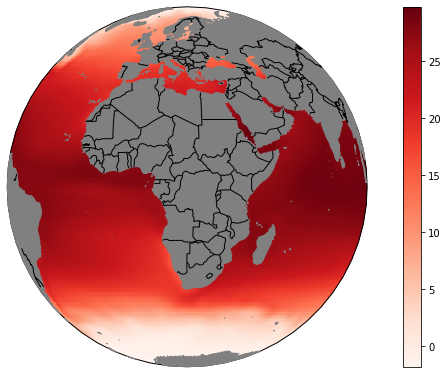

In [12]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add figure axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Orthographic(20, -0))
# Plot data
p = plt.pcolormesh(mean_sst.lon,mean_sst.lat,mean_sst,transform=ccrs.PlateCarree(),cmap='Reds')
# Add land feature
ax.add_feature(land_50m, zorder=10)
# Add countries feature
ax.add_feature(countries,zorder=11)
# Add colorbar
plt.colorbar()

#### `xarray` is a package that natively allows users to plot using cartopy

Note that by default xarray deals with the same issue.

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = mean_sst.plot(subplot_kws=dict(projection=ccrs.Orthographic(-100, 30), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds')
# Add land feature
p.axes.add_feature(land_50m, zorder=10)

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = mean_sst.plot(subplot_kws=dict(projection=ccrs.Orthographic(20, -0), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds',vmin=-5,vmax=30)
# Add land feature
p.axes.add_feature(land_10m, zorder=10)

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = mean_sst.plot(subplot_kws=dict(projection=ccrs.Robinson(central_longitude = 0), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds',vmin=-5,vmax=30)
# Add land feature
p.axes.add_feature(land_50m, zorder=10)

#### Now let's plot only a section of the data:

In [ ]:
# Rotate coordinates from 0-360 degrees to -180 to 180.
mean_sst_rotate_coords = mean_sst.assign_coords(lon=(((mean_sst.lon + 180) % 360) - 180)).sortby('lon')
# Slice data
SST_atlantic_ocean = mean_sst_rotate_coords.sel({'lat':slice(30,-50),'lon':slice(-50,40)})

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = SST_atlantic_ocean.plot(subplot_kws=dict(projection=ccrs.Orthographic(central_longitude = 0), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds',vmin=18,vmax=28)
# Add land feature
p.axes.add_feature(land_50m, zorder=10)

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = SST_atlantic_ocean.plot(subplot_kws=dict(projection=ccrs.Orthographic(central_longitude = 0), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds',vmin=18,vmax=28)
# Add land feature
p.axes.add_feature(land_50m, zorder=10)
# Set extent of map to global
p.axes.set_global()

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = SST_atlantic_ocean.plot(subplot_kws=dict(projection=ccrs.Orthographic(central_longitude = 0), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds',vmin=18,vmax=28)
# Add land feature
p.axes.add_feature(land_50m, zorder=10)
# Set extent of map allows to select the coordinates of the map (Similar result as before).
p.axes.set_extent((-89,89,-89,89))

### Now let's create our own projection:

We will explore Myriahedral projections. 

Have a look here to learn more about them:
https://philogb.github.io/page/myriahedral/.

Here we will reproduce the Cylindrical myriahedral projection, however some of the other projections will be significantly more challenging.

The Cylindrical Myriahedral projection is a natural development from a Sinusoidal projection, therefore, we will start ploting the data in a sinusoidal projection.

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Sinusoidal(0))
# Plot data
p = plt.pcolormesh(mean_sst_rotate_coords.lon,mean_sst_rotate_coords.lat,mean_sst_rotate_coords,transform=ccrs.PlateCarree(),cmap='Reds')
# Set extent of map.
ax.set_global()
# Add land feature
ax.add_feature(land_50m, zorder=10)
# Add colorbar
plt.colorbar()

Now we set the extend of the plot to only obtain the width of a gore, in this case -15° to 15°

In [ ]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Sinusoidal(0))
# Plot data
p = plt.pcolormesh(mean_sst_rotate_coords.lon,mean_sst_rotate_coords.lat,mean_sst_rotate_coords,transform=ccrs.PlateCarree(),cmap='Reds')
# Set extent of map to slice data.
ax.set_extent((-15,15,-90,90))
# Add land feature
ax.add_feature(land_50m, zorder=10)

In order to mask the data we have to provide a boundary to the map:

In [ ]:
# Import additional libraries to construct Myriahedral projection
import numpy as np 
import matplotlib.path as mpath
import matplotlib.patches as mpatches

# Create figure and axes
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1], projection=ccrs.Sinusoidal(0))

# Geometry of ellipse to bound map.
theta = np.linspace(-np.pi, np.pi, 100)
psi = np.linspace(-np.pi, np.pi, 100)
r, R = 15, 90
verts = np.vstack([ r * np.cos(theta), -R *np.sin(psi) ]).T

bound = mpath.Path(verts)
# Set bounds to map.
ax.set_boundary(bound,ccrs.PlateCarree(0))

# Slice data to region of interest
data = mean_sst_rotate_coords.sel(lon=slice(-15,15))
# Plot data
p = plt.pcolormesh(data.lon,data.lat,data,transform=ccrs.PlateCarree(),cmap='Reds')

# Add land
ax.add_feature(land_50m, zorder=10)


Now let's create all the gores.

In [ ]:
# Define a function to generate the gore boundary.
def gore_boundary(gore_width):
    # Sphere coordinates
    theta = np.linspace(-np.pi, np.pi, 100)
    psi = np.linspace(-np.pi, np.pi, 100)
    r, R = gore_width/2, 90
    # Ellipse verts
    verts = np.vstack([ r * np.cos(theta), - R *np.sin(psi) ]).T
    # Bounding path
    bound = mpath.Path(verts)
    return bound

In [ ]:
import numpy as np 
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 5))

# Width of gorges 
gore_width = 30
gores = 360//gore_width

for ii in range(gores):
    # Project data into Sinusoidal projection.
    ax = fig.add_axes([ii*(1/gores),0,1/gores,1], projection=ccrs.Sinusoidal(ii*(gore_width)+gore_width/2))
    # Set boundary according to an ellipse of radius r and R
    ax.set_boundary(gore_boundary(gore_width),ccrs.PlateCarree(ii*(gore_width)+gore_width/2))
    # Slice data
    data = mean_sst.sel(lon=slice(ii*(gore_width),ii*(gore_width)+gore_width))
    # Pcolormesh data over map
    p = plt.pcolormesh(data.lon,data.lat,data,transform=ccrs.PlateCarree(),cmap='Reds')
    # Add land to each subplot
    ax.add_feature(land_50m, zorder=10)

### Now you can play with different projections and the cyldrical Myriahedral projection.